### 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.formula.api as smf
import sklearn as linear_regression

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.2. Creating a DataFrame Object from csv file

In [3]:
data=pd.read_csv('Bank_Data.csv')
data=data.dropna(axis=1,how='all') #to drop empty columns 
print(data)

     Employee  EducLev  JobGrade  YrHired  Age  Gender  YrsPrior PCJob  Salary
0           2        1         1       14   38  Female         1    No    32.0
1           3        1         1       12   35  Female         0    No    39.1
2           4        2         1        8   40  Female         7    No    33.2
3           6        3         1        3   24  Female         0    No    30.6
4           7        3         1        4   27  Female         0    No    29.0
..        ...      ...       ...      ...  ...     ...       ...   ...     ...
203       203        5         6       39   65    Male         0    No    95.0
204       204        3         6       34   60    Male         0    No    97.0
205       205        5         6       36   61    Male         0    No    88.0
206       206        5         6       32   62    Male         0    No    94.0
207       207        5         6       35   59    Male         0    No    30.0

[208 rows x 9 columns]


### 1.3. Verifying Data Frame properties

In [4]:
data.shape

(208, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Employee  208 non-null    int64  
 1   EducLev   208 non-null    int64  
 2   JobGrade  208 non-null    int64  
 3   YrHired   208 non-null    int64  
 4   Age       208 non-null    int64  
 5   Gender    208 non-null    object 
 6   YrsPrior  208 non-null    int64  
 7   PCJob     208 non-null    object 
 8   Salary    208 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 14.8+ KB


### 1.4. Converting string values to categories

In [6]:
data['Gender'].astype('category') #add data['Gender'] instead of ['Sex']

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
203      Male
204      Male
205      Male
206      Male
207      Male
Name: Gender, Length: 208, dtype: category
Categories (2, object): ['Female', 'Male']

In [7]:
data['Gender']=data['Gender'].astype('category') 
data['PCJob']=data['PCJob'].astype('category')

In [8]:
data.describe(include='category')

,Gender,PCJob
count,208,208
unique,2,2
top,Female,No
freq,140,189


### 1.5. Type conversion using programming constructs

In [9]:
for col in data[['Gender', 'PCJob']]:
    data[col]=data[col].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Employee  208 non-null    int64   
 1   EducLev   208 non-null    int64   
 2   JobGrade  208 non-null    int64   
 3   YrHired   208 non-null    int64   
 4   Age       208 non-null    int64   
 5   Gender    208 non-null    category
 6   YrsPrior  208 non-null    int64   
 7   PCJob     208 non-null    category
 8   Salary    208 non-null    float64 
dtypes: category(2), float64(1), int64(6)
memory usage: 12.1 KB


### 1.6. Basic descriptive statistics

In [10]:
data['Salary'].mean()

39.921923076923086

In [11]:
pay=data['Salary']
pay.min(),pay.mean(),pay.median(), pay.max()

(26.7, 39.921923076923086, 37.0, 97.0)

### 1.7. Creating histogram using seaborn

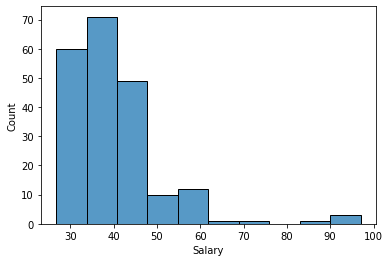

In [12]:
sns.histplot(x=data['Salary'], bins=10, kde=False);

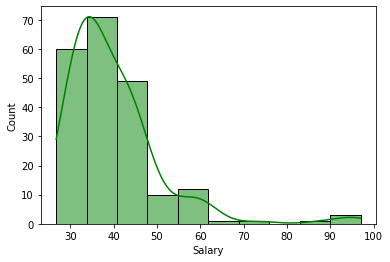

In [13]:
sns.histplot(x=data['Salary'],bins=10,kde=True, color = 'Green');

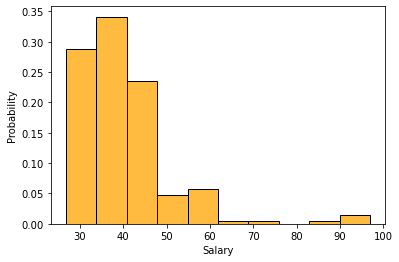

In [14]:
sns.histplot(x=data['Salary'],bins=10,kde=False,stat='probability',color='Orange');

### 1.8. Creating a boxplot using Seaborn

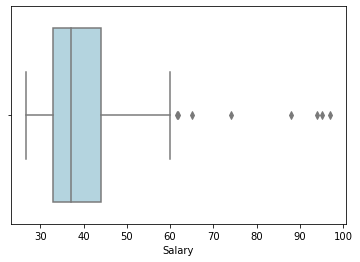

In [15]:
sns.boxplot(x=data['Salary'], color = 'lightblue');

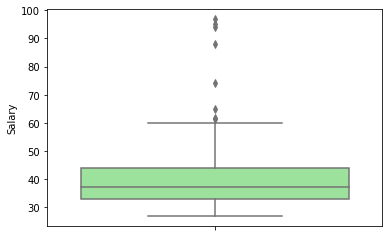

In [16]:
sns.boxplot(y=data['Salary'], color='lightgreen', showcaps=True);

### 1.9. Filtering the data by attributes


In [17]:
data['Gender'] =='Female'

0       True
1       True
2       True
3       True
4       True
       ...  
203    False
204    False
205    False
206    False
207    False
Name: Gender, Length: 208, dtype: bool

In [18]:
data[data['Gender'] == 'Female']

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary
0,2,1,1,14,38,Female,1,No,32.00
1,3,1,1,12,35,Female,0,No,39.10
2,4,2,1,8,40,Female,7,No,33.20
3,6,3,1,3,24,Female,0,No,30.60
4,7,3,1,4,27,Female,0,No,29.00
...,...,...,...,...,...,...,...,...,...
135,123,3,3,3,27,Female,2,Yes,43.50
136,131,5,3,3,33,Female,5,Yes,42.00
137,163,3,4,19,59,Female,8,Yes,40.30
138,167,1,4,12,39,Female,4,Yes,44.00


In [19]:
FemaleEmployees = data[data['Gender']=='Female']
type(FemaleEmployees)

pandas.core.frame.DataFrame

In [20]:
FemaleEmployees['Salary'].mean()

34.66414285714287

In [21]:
round(FemaleEmployees['Salary'].mean(), 2)

34.66

In [22]:
(data['Gender']=='Female') & (data['EducLev'] == 1)

0       True
1       True
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

### 2.0. Complex filtering

In [23]:
data[(data['Gender']=='Female') & (data['EducLev'] ==1)].shape

(33, 9)

In [24]:
data[data['EducLev']>=4]

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary
53,80,5,2,8,40,Female,0,No,29.65
55,82,5,2,4,29,Female,4,No,29.80
58,90,5,2,3,35,Female,2,No,29.60
61,97,4,2,5,29,Female,0,No,33.00
67,105,5,3,7,32,Female,3,No,41.40
...,...,...,...,...,...,...,...,...,...
202,202,4,6,21,53,Male,0,No,74.00
203,203,5,6,39,65,Male,0,No,95.00
205,205,5,6,36,61,Male,0,No,88.00
206,206,5,6,32,62,Male,0,No,94.00


In [25]:
manager =[4,5,6]
data[data['EducLev'].isin(manager)]

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary
53,80,5,2,8,40,Female,0,No,29.65
55,82,5,2,4,29,Female,4,No,29.80
58,90,5,2,3,35,Female,2,No,29.60
61,97,4,2,5,29,Female,0,No,33.00
67,105,5,3,7,32,Female,3,No,41.40
...,...,...,...,...,...,...,...,...,...
202,202,4,6,21,53,Male,0,No,74.00
203,203,5,6,39,65,Male,0,No,95.00
205,205,5,6,36,61,Male,0,No,88.00
206,206,5,6,32,62,Male,0,No,94.00


### 2.1.Data Encoding

In [26]:
data['Dummy']=0
data.head()

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary,Dummy
0,2,1,1,14,38,Female,1,No,32.0,0
1,3,1,1,12,35,Female,0,No,39.1,0
2,4,2,1,8,40,Female,7,No,33.2,0
3,6,3,1,3,24,Female,0,No,30.6,0
4,7,3,1,4,27,Female,0,No,29.0,0


In [27]:
data.drop(columns=['Dummy'], inplace=True)
data.head()

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary
0,2,1,1,14,38,Female,1,No,32.0
1,3,1,1,12,35,Female,0,No,39.1
2,4,2,1,8,40,Female,7,No,33.2
3,6,3,1,3,24,Female,0,No,30.6
4,7,3,1,4,27,Female,0,No,29.0


In [28]:
data['GenderDummy_F']=np.where(data['Gender']=='Female',1,0) # We have added a new column GenderDummy_F
data.head()

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary,GenderDummy_F
0,2,1,1,14,38,Female,1,No,32.0,1
1,3,1,1,12,35,Female,0,No,39.1,1
2,4,2,1,8,40,Female,7,No,33.2,1
3,6,3,1,3,24,Female,0,No,30.6,1
4,7,3,1,4,27,Female,0,No,29.0,1


### 2.2. Applying logic function

In [29]:
def my_encode(gender):
    if gender == 'Female':
        return 1
    else: 
        return 0

In [30]:
my_encode('Female'), my_encode('Male')

(1, 0)

In [31]:
data['GenderDummy_F']=data['Gender'].apply(my_encode)
data.head()

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary,GenderDummy_F
0,2,1,1,14,38,Female,1,No,32.0,1
1,3,1,1,12,35,Female,0,No,39.1,1
2,4,2,1,8,40,Female,7,No,33.2,1
3,6,3,1,3,24,Female,0,No,30.6,1
4,7,3,1,4,27,Female,0,No,29.0,1


### 2.3. Applying Lambda function

In [32]:
data['GenderDummy_F']=data['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 
data.head()

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary,GenderDummy_F
0,2,1,1,14,38,Female,1,No,32.0,1
1,3,1,1,12,35,Female,0,No,39.1,1
2,4,2,1,8,40,Female,7,No,33.2,1
3,6,3,1,3,24,Female,0,No,30.6,1
4,7,3,1,4,27,Female,0,No,29.0,1


### 2.4. Replacing values from data object list

In [33]:
job_grade=[1,2,3,4,5,6]
status = ['non-manager', 'non-manager','non-manager','non-manager','manager', 'manager']
data['Bank Manager'] = data['JobGrade'].replace(job_grade,status)
data[180:185]

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary,GenderDummy_F,Bank Manager
180,160,1,4,23,55,Male,0,No,45.0,0,non-manager
181,161,3,4,5,52,Male,4,No,52.5,0,non-manager
182,165,3,4,6,43,Male,4,No,47.5,0,non-manager
183,174,5,5,7,34,Male,0,No,48.0,0,manager
184,176,5,5,8,31,Male,0,No,46.5,0,manager


In [34]:
genders=['Female','Male']
dummy_vars =[1,0]
data['GendersDummy_F'] = data['Gender'].replace(genders, dummy_vars)
data.head()

,Employee,EducLev,JobGrade,YrHired,Age,Gender,YrsPrior,PCJob,Salary,GenderDummy_F,Bank Manager,GendersDummy_F
0,2,1,1,14,38,Female,1,No,32.0,1,non-manager,1
1,3,1,1,12,35,Female,0,No,39.1,1,non-manager,1
2,4,2,1,8,40,Female,7,No,33.2,1,non-manager,1
3,6,3,1,3,24,Female,0,No,30.6,1,non-manager,1
4,7,3,1,4,27,Female,0,No,29.0,1,non-manager,1


### 2.5. Variable logging

In [35]:
data['logSalary']=np.log(data['Salary'])

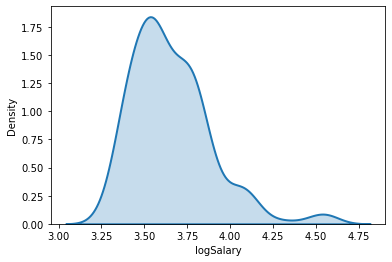

In [36]:
sns.kdeplot(x=data['logSalary'], shade = True, linewidth = 2); # make sure to include a semi colon to hide axes

### 2.6. Analysis of gaps in continuous variables

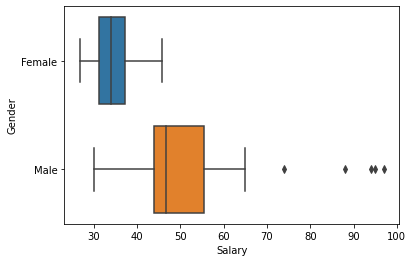

In [37]:
sns.boxplot(x=data['Salary'], y=data['Gender'], showcaps = True);

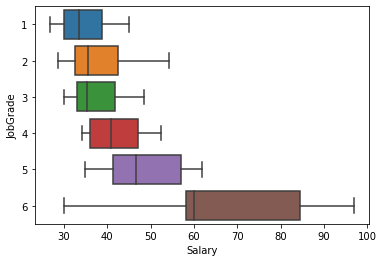

In [38]:
sns.boxplot(x=data['Salary'], y=data['JobGrade'].astype('category'),showcaps=True);
#Here we can observe that managers have both higher mean salaries and higher variability in salaries than lower job grades

### 2.7. Building Histograms

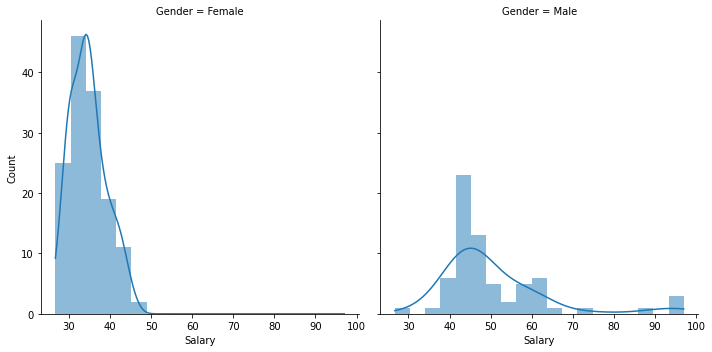

In [39]:
sns.displot(data, x='Salary', col='Gender', linewidth =0, kde=True)
#Here we see a case where male employees salaries are higher than female employees by gender and salary plot

### 2.8. Kernel density plot (kde)

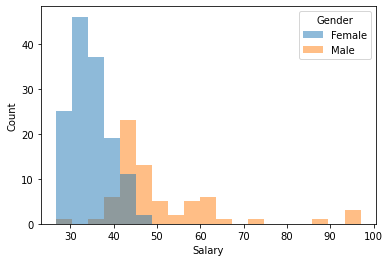

In [40]:
sns.histplot(x='Salary',hue='Gender', data=data,linewidth=0);

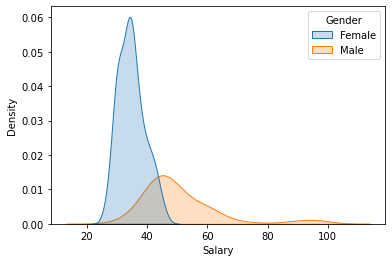

In [41]:
sns.kdeplot(x='Salary', hue='Gender', data=data, shade=True);

### 2.9. t-Tests

In [42]:
# We are now going to format the data
# We are going to redefine the salary variables by gender, female and male
female_sal=data[data['Gender'] == 'Female']['Salary']
male_sal=data[data['Gender']=='Male']['Salary'] # created new vectors female_sal and male_sal

In [43]:
female_sal

0      32.00
1      39.10
2      33.20
3      30.60
4      29.00
       ...  
135    43.50
136    42.00
137    40.30
138    44.00
139    40.66
Name: Salary, Length: 140, dtype: float64

In [44]:
male_sal

140    39.70
141    45.00
142    43.90
143    38.00
144    39.02
       ...  
203    95.00
204    97.00
205    88.00
206    94.00
207    30.00
Name: Salary, Length: 68, dtype: float64

Here too we can observe the salary disparity between female and male employees by gender

### 3.0. Testing for equality of variance (F-test)

In [45]:
stats.levene(female_sal,male_sal)

LeveneResult(statistic=23.50846181190304, pvalue=2.446970188404662e-06)

#### Running the t-test

In [46]:
model =sms.CompareMeans.from_data(data[data['Gender']=='Female']['Salary'],data[data['Gender']=='Male']['Salary'])
model.summary(usevar='unequal')

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-16.0826,1.648,-9.759,0.000,-19.366,-12.799


### 3.1. Analysis of categorical variables

In [47]:
grades=[1,2,3,4,5,6]
status=['non-manager','non-manager','non-manager','non-manager','manager','manager']
data['Bank_Manager']=data['JobGrade'].replace(grades,status)

In [48]:
contab_freq =pd.crosstab(data['Gender'], data['Bank_Manager'],margins = True)
contab_freq

Bank_Manager,manager,non-manager,All
Gender,,,
Female,10,130,140
Male,25,43,68
All,35,173,208


### 3.2. Showing row data in percentages

In [49]:
contitab_relfreq =pd.crosstab(data['Gender'], data['Bank_Manager'], margins = True, normalize = 'index')
contitab_relfreq # No semicolon here

Bank_Manager,manager,non-manager
Gender,,
Female,0.071429,0.928571
Male,0.367647,0.632353
All,0.168269,0.831731


Data analysis: We can see here that each row sums to 100%. Therefore, for the total set of female employees, 7% are bank_managers and 93% are non-managers. For males, 37% are managers and 63% are non-managers. The advantage of this presentation is that these percentages are directly comparable even though the majority (140/208) employees of the bank *are female.

### 3.3. Statistical analysis test of independence using Chi-squared

In [50]:
contab_abc=pd.crosstab(data['Gender'], data['Bank_Manager'],margins = False)
chi = stats.chi2_contingency(contab_abc)
chi

(26.617776266575998,
 2.479518719230249e-07,
 1,
 array([[ 23.55769231, 116.44230769],
        [ 11.44230769,  56.55769231]]))

The output is a matrix showing the expected frequencies under the assumption in independence. These expected values are quite different from the observed values above.